In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import gc

In [ ]:
# Mount Google Drive and set the working directory
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
os.chdir("/content/gdrive/Shareddrives/STA 221/data")


Mounted at /content/gdrive/


In [ ]:
# Load the dataset
file_name = 'train_knn_imputed_final_with_1hot_encoding.csv'
data = pd.read_csv(file_name)


In [ ]:
# Define the feature groups and prefixes
feature_groups = {
    'bg': 'bg',
    'cals': 'cals',
    'insulin': 'insulin',
    'carbs': 'carbs',
    'hr': 'hr',
    'steps': 'steps',
    'activity': 'activity'
}

In [ ]:
# # Calculate average skewness for each feature group
# mean_skewness = [
#     np.mean(data.filter(like=prefix).skew()) for prefix in feature_groups.values()
# ]

# Initialize a dictionary to store mean skewness for each feature group
mean_skewness = {}

# Iterate through each feature group to calculate skewness
for group_name, prefix in feature_groups.items():
    print(f"Processing feature group: {group_name}...")

    # Select columns related to the current prefix
    subset = data.filter(like=prefix)

    # Process each column individually to calculate skewness
    column_skewness = []
    for col in subset.columns:
        column_skewness.append(subset[col].skew())

        # Free memory for each column after processing
        del subset[col]
        gc.collect()

    # Calculate and store the mean skewness for the group
    mean_skewness[group_name] = np.mean(column_skewness)

    # Free memory for the subset
    del subset
    gc.collect()


Processing feature group: bg...
Processing feature group: cals...
Processing feature group: insulin...
Processing feature group: carbs...
Processing feature group: hr...
Processing feature group: steps...
Processing feature group: activity...


In [ ]:
# Tabulate skewness results
skewness_table = tabulate(
    list(mean_skewness.items()),
    headers=['Feature Group', 'Avg Skewness'],
    tablefmt='pretty'
)

print("Average Skewness for Feature Groups:")
print(skewness_table)

Average Skewness for Feature Groups:
+---------------+----------------------+
| Feature Group |     Avg Skewness     |
+---------------+----------------------+
|      bg       | 0.11138226258087207  |
|     cals      | 0.34214343182889617  |
|    insulin    |  14.882505708319608  |
|     carbs     | -0.29044904369478114 |
|      hr       | 0.21360577194625055  |
|     steps     | 0.16473224220651217  |
|   activity    |  106.64298886349052  |
+---------------+----------------------+


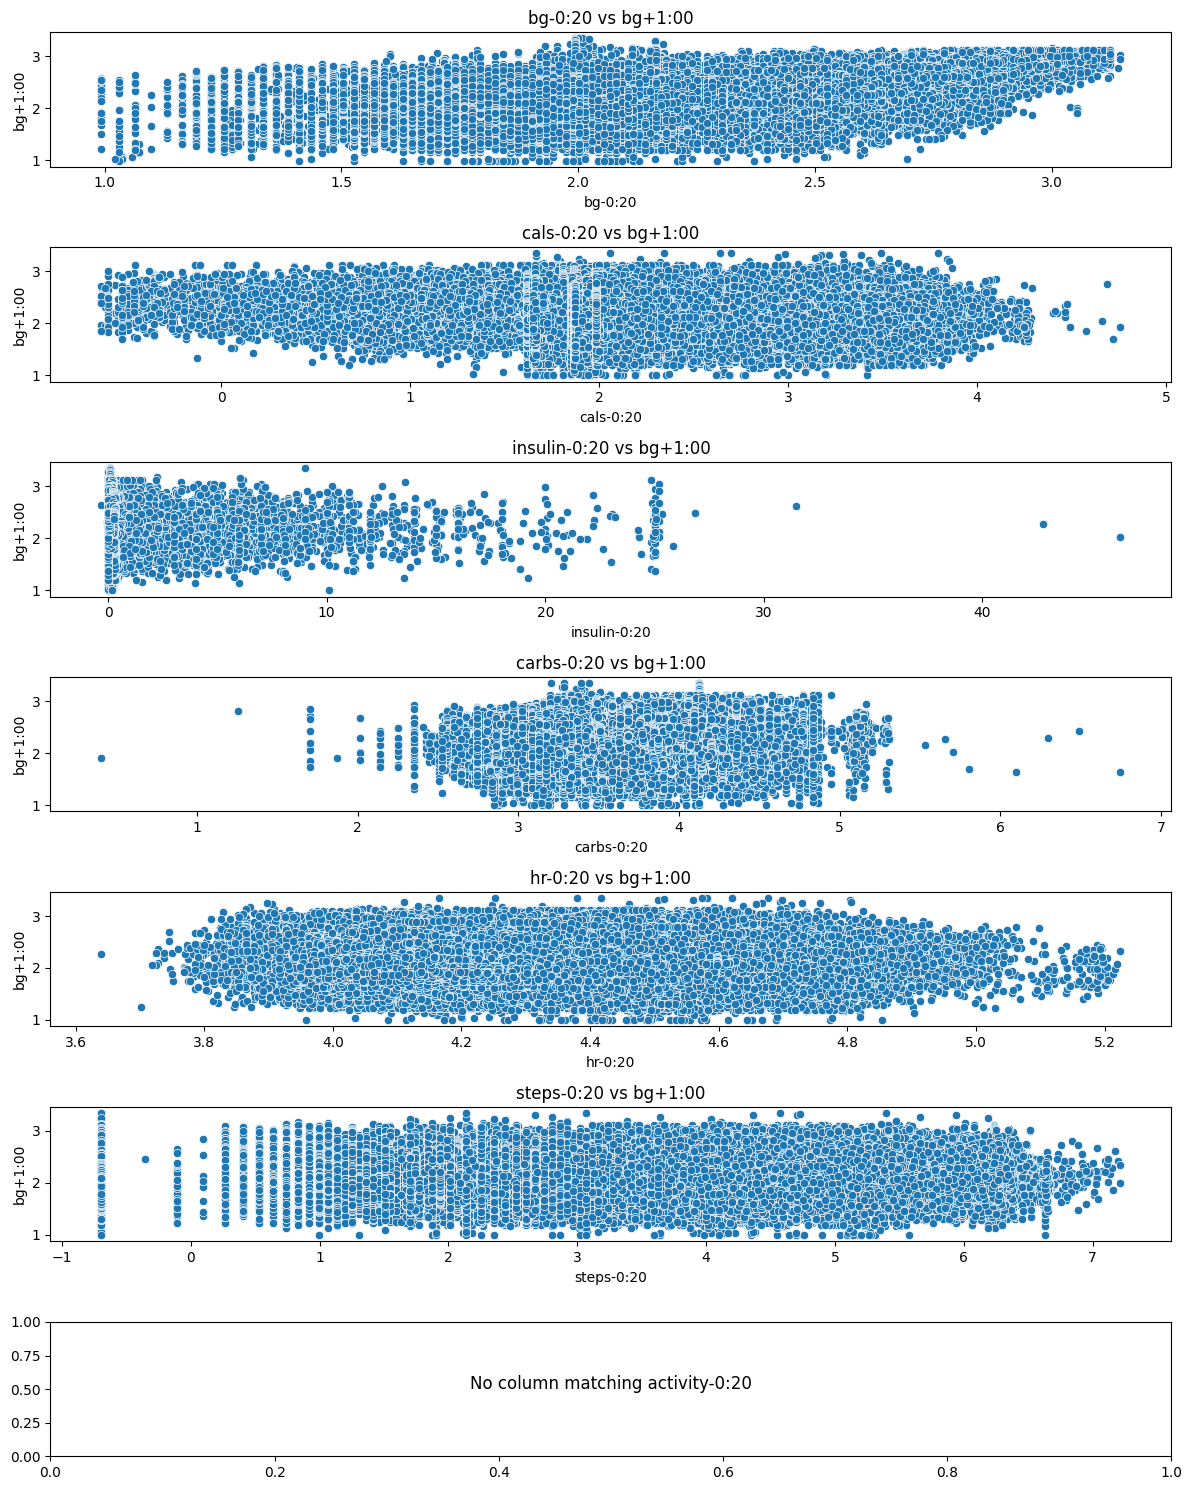

In [ ]:
# Plot scatterplots for representative features in each group
fig, ax = plt.subplots(len(feature_groups), 1, figsize=(12, 15))

for i, (group_name, prefix) in enumerate(feature_groups.items()):
    # Try to find a representative column for each prefix (e.g., {prefix}-0:20)
    representative_column = f'{prefix}-0:20'
    if representative_column in data.columns:
        sns.scatterplot(
            x=representative_column, y='bg+1:00', data=data, ax=ax[i]
        )
        ax[i].set_title(f'{representative_column} vs bg+1:00')
    else:
        ax[i].text(0.5, 0.5, f"No column matching {representative_column}",
                   fontsize=12, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate correlations dynamically for normalized and skewed features
target_variable = 'bg+1:00'
correlation_results = {}

for group_name, prefix in feature_groups.items():
    # Decide correlation method based on skewness
    if group_name in ['bg', 'cals', 'carbs', 'hr', 'steps']:  # Normalized features: Pearson
        method = 'pearson'
    elif group_name in ['insulin', 'activity']:  # Skewed features: Spearman
        method = 'spearman'
    else:
        continue  # Skip if group not categorized

    # Calculate correlation for the feature group
    group_corr = data.filter(like=prefix).corrwith(data[target_variable], method=method)

    # Store and display results
    correlation_results[group_name] = group_corr
    print(f"\nCorrelation Results for {group_name} ({method}):")
    print(group_corr)
    print(f"Min {group_name}_corr: {group_corr.min()}")
    print(f"Max {group_name}_corr: {group_corr.max()}")
    print(f"Mean {group_name}_corr: {group_corr.mean()}")



Correlation Results for bg (pearson):
bg-5:55    0.168560
bg-5:50    0.107462
bg-5:45    0.143365
bg-5:40    0.169330
bg-5:35    0.105317
             ...   
bg-0:15    0.575900
bg-0:10    0.510372
bg-0:05    0.552577
bg-0:00    0.652487
bg+1:00    1.000000
Length: 73, dtype: float64
Min bg_corr: 0.1030935061351566
Max bg_corr: 1.0
Mean bg_corr: 0.24422623166176538

Correlation Results for cals (pearson):
cals-5:55   -0.068880
cals-5:50   -0.069263
cals-5:45   -0.070222
cals-5:40   -0.071581
cals-5:35   -0.071245
               ...   
cals-0:20   -0.099572
cals-0:15   -0.097496
cals-0:10   -0.096078
cals-0:05   -0.093802
cals-0:00   -0.094494
Length: 72, dtype: float64
Min cals_corr: -0.10254332142402714
Max cals_corr: -0.06888039812461885
Mean cals_corr: -0.08654832212615102

Correlation Results for insulin (spearman):
insulin-5:55    0.106513
insulin-5:50    0.104955
insulin-5:45    0.103371
insulin-5:40    0.101900
insulin-5:35    0.099649
                  ...   
insulin-0:20    0

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]



Correlation Results for activity (spearman):
activity-5:55_Indoor_climbing           NaN
activity-5:55_Run                 -0.035916
activity-5:55_Strength_training         NaN
activity-5:55_Swim                -0.008967
activity-5:55_Bike                 0.003771
                                     ...   
activity-0:00_Yoga                 0.001254
activity-0:00_Swimming             0.004044
activity-0:00_Weights             -0.003692
activity-0:00_Running              0.004312
activity-0:00_No_Activity               NaN
Length: 1656, dtype: float64
Min activity_corr: -0.03591595752824582
Max activity_corr: 0.02380713642670924
Mean activity_corr: -0.0007759153929406981


In [ ]:
# # Calculate Pearson correlation for bg and cals, and Spearman for insulin
# target_variable = 'bg+1:00'
# correlation_results = {}
# for group_name, prefix in feature_groups.items():
#     if group_name in ['bg', 'cals']:  # Pearson for bg and cals
#         group_corr = data.filter(like=prefix).corrwith(data[target_variable], method='pearson')
#     else:  # Spearman for insulin
#         group_corr = data.filter(like=prefix).corrwith(data[target_variable], method='spearman')

#     correlation_results[group_name] = group_corr
#     print(f"\nCorrelation Results for {group_name}:")
#     print(group_corr)
#     print(f"Min {group_name}_corr: {group_corr.min()}")
#     print(f"Max {group_name}_corr: {group_corr.max()}")
#     print(f"Mean {group_name}_corr: {group_corr.mean()}")


Correlation Results for bg:
bg-5:55    0.168560
bg-5:50    0.107462
bg-5:45    0.143365
bg-5:40    0.169330
bg-5:35    0.105317
             ...   
bg-0:15    0.575900
bg-0:10    0.510372
bg-0:05    0.552577
bg-0:00    0.652487
bg+1:00    1.000000
Length: 73, dtype: float64
Min bg_corr: 0.1030935061351566
Max bg_corr: 1.0
Mean bg_corr: 0.24422623166176538

Correlation Results for cals:
cals-5:55   -0.068880
cals-5:50   -0.069263
cals-5:45   -0.070222
cals-5:40   -0.071581
cals-5:35   -0.071245
               ...   
cals-0:20   -0.099572
cals-0:15   -0.097496
cals-0:10   -0.096078
cals-0:05   -0.093802
cals-0:00   -0.094494
Length: 72, dtype: float64
Min cals_corr: -0.10254332142402714
Max cals_corr: -0.06888039812461885
Mean cals_corr: -0.08654832212615102

Correlation Results for insulin:
insulin-5:55    0.106513
insulin-5:50    0.104955
insulin-5:45    0.103371
insulin-5:40    0.101900
insulin-5:35    0.099649
                  ...   
insulin-0:20    0.226911
insulin-0:15    0.23915